In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, weibull_min

In [2]:
def plot_survival_and_hazard(survival_function, hazard_function, t_grid, distribution_name):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
    axs[0, 0].plot(t_grid, survival_function(0.75, 1, t_grid), label=r"$\lambda_i=0.75, \sigma=1$")
    axs[0, 0].plot(t_grid, survival_function(1, 1, t_grid), label=r"$\lambda_i=1, \sigma=1$")
    axs[0, 0].plot(t_grid, survival_function(2, 1, t_grid), label=r"$\lambda_i=2, \sigma=1$")
    axs[0, 0].plot(t_grid, survival_function(5, 1, t_grid), label=r"$\lambda_i=5, \sigma=1$")
    axs[0, 0].set(ylabel="S(t)", title=f"{distribution_name} survival function for different parameter values")
    axs[0, 0].legend()

    axs[1, 0].plot(t_grid, survival_function(1, 0.75, t_grid), label=r"$\lambda_i=1, \sigma=0.75$")
    axs[1, 0].plot(t_grid, survival_function(1, 1, t_grid), label=r"$\lambda_i=1, \sigma=1$")
    axs[1, 0].plot(t_grid, survival_function(1, 2, t_grid), label=r"$\lambda_i=1, \sigma=2$")
    axs[1, 0].plot(t_grid, survival_function(1, 5, t_grid), label=r"$\lambda_i=1, \sigma=5$")
    axs[1, 0].set(xlabel="t", ylabel="S(t)")
    axs[1, 0].legend()

    axs[0, 1].plot(t_grid, hazard_function(0.75, 1, t_grid), label=r"$\lambda_i=0.75, \sigma=1$")
    axs[0, 1].plot(t_grid, hazard_function(1, 1, t_grid), label=r"$\lambda_i=1, \sigma=1$")
    axs[0, 1].plot(t_grid, hazard_function(2, 1, t_grid), label=r"$\lambda_i=2, \sigma=1$")
    axs[0, 1].plot(t_grid, hazard_function(5, 1, t_grid), label=r"$\lambda_i=5, \sigma=1$")
    axs[0, 1].set_ylim(bottom=0)
    axs[0, 1].legend()

    axs[1, 1].plot(t_grid, hazard_function(1, 0.75, t_grid), label=r"$\lambda_i=1, \sigma=0.75$")
    axs[1, 1].plot(t_grid, hazard_function(1, 1, t_grid), label=r"$\lambda_i=1, \sigma=1$")
    axs[1, 1].plot(t_grid, hazard_function(1, 2, t_grid), label=r"$\lambda_i=1, \sigma=2$")
    axs[1, 1].plot(t_grid, hazard_function(1, 5, t_grid), label=r"$\lambda_i=1, \sigma=5$")
    axs[1, 1].set_ylim(bottom=0)
    axs[1, 1].legend()

    plt.show()

# Weibull

C:\Users\marij\AppData\Local\Temp\ipykernel_17712\2845270145.py:6: RuntimeWarning: divide by zero encountered in scalar power
  return [lambd * 1 / sigma * t ** (1 / sigma - 1) for t in t_grid]


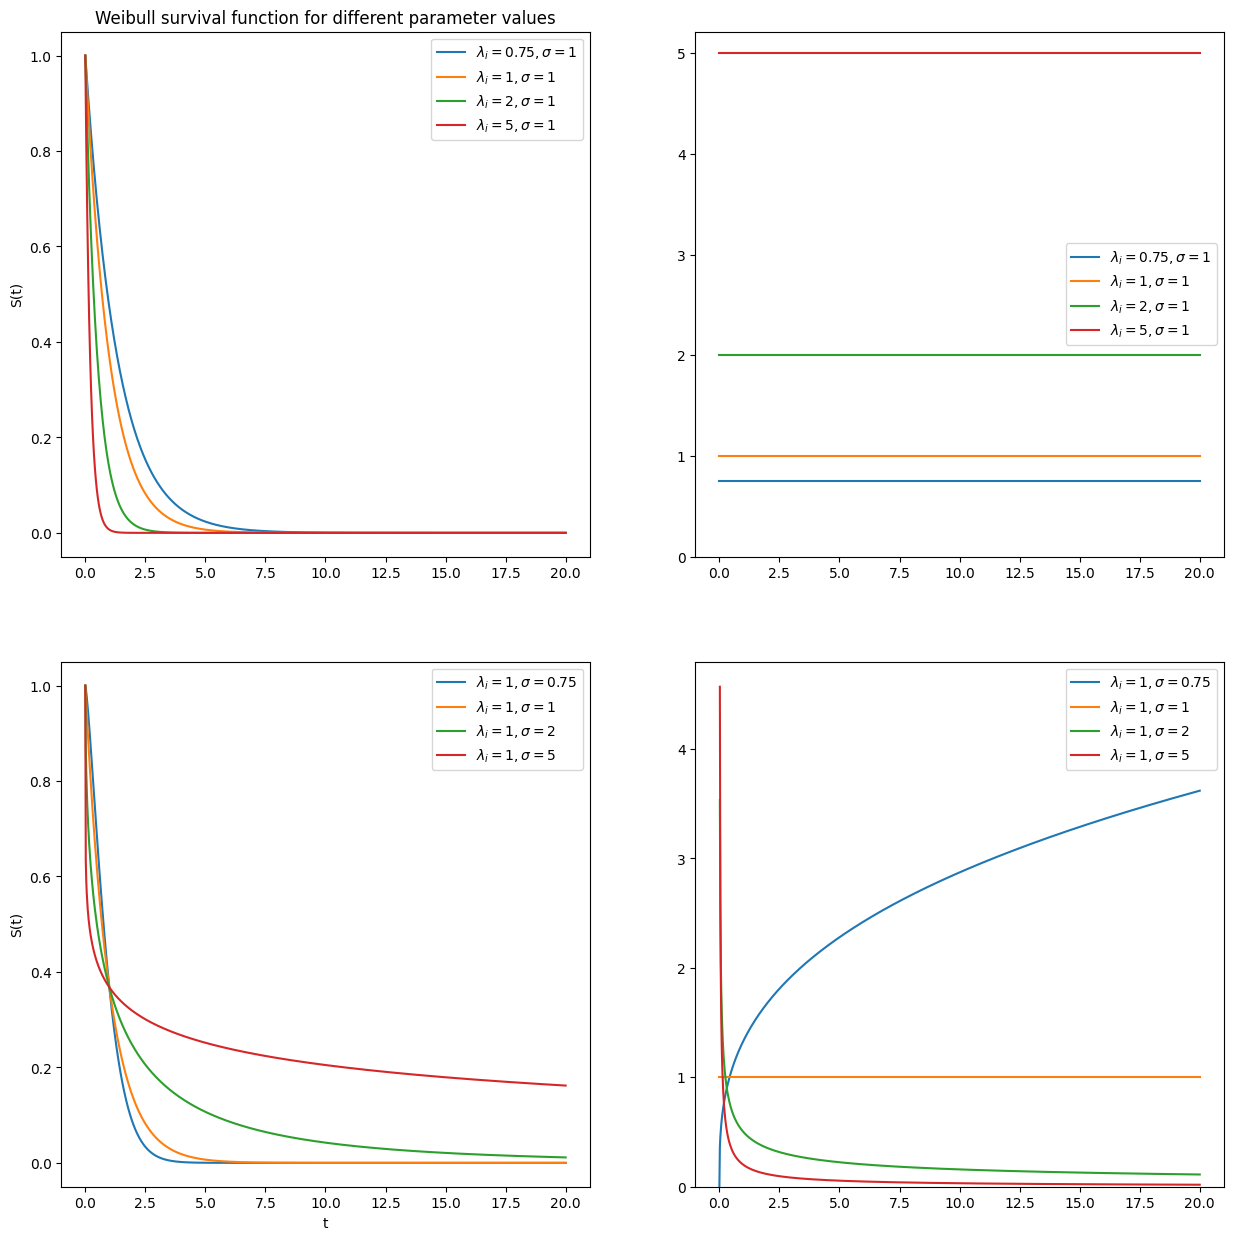

In [3]:
def weibull_survival(lambd, sigma, t_grid):
    return np.exp([-lambd * t ** (1 / sigma) for t in t_grid])


def weibull_hazard(lambd, sigma, t_grid):
    return [lambd * 1 / sigma * t ** (1 / sigma - 1) for t in t_grid]


t_grid = np.linspace(0, 20, 1000)
plot_survival_and_hazard(weibull_survival, weibull_hazard, t_grid, "Weibull")

# Log-logistic

C:\Users\marij\AppData\Local\Temp\ipykernel_17712\4113937888.py:2: RuntimeWarning: divide by zero encountered in log
  return 1 / (1 + np.exp([(np.log(t) - mu_eta) / sigma for t in t_grid]))
C:\Users\marij\AppData\Local\Temp\ipykernel_17712\4113937888.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  return [1 / (sigma * t) for t in t_grid] * log_log_survival(mu_eta, sigma, t_grid)


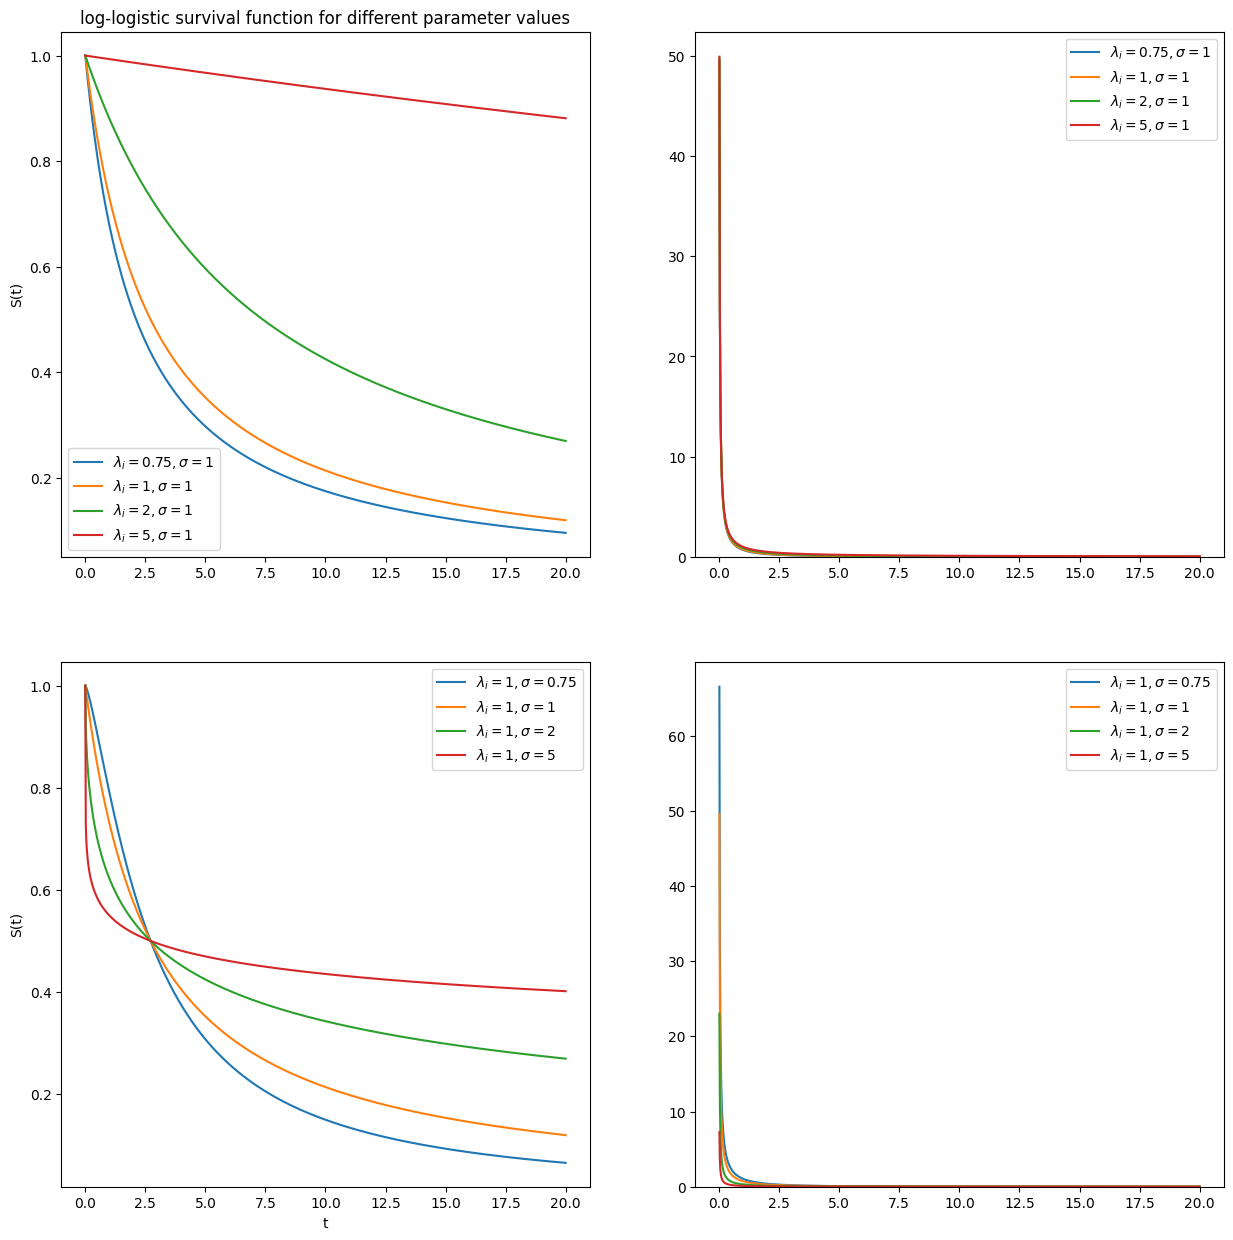

In [4]:
def log_log_survival(mu_eta, sigma, t_grid):
    return 1 / (1 + np.exp([(np.log(t) - mu_eta) / sigma for t in t_grid]))


def log_log_hazard(mu_eta, sigma, t_grid):
    return [1 / (sigma * t) for t in t_grid] * log_log_survival(mu_eta, sigma, t_grid)


plot_survival_and_hazard(log_log_survival, log_log_hazard, t_grid, "log-logistic")

# Log-normal

C:\Users\marij\AppData\Local\Temp\ipykernel_17712\2973027568.py:2: RuntimeWarning: divide by zero encountered in log
  return 1 - norm.cdf([(np.log(t) - mu_eta) / sigma for t in t_grid])


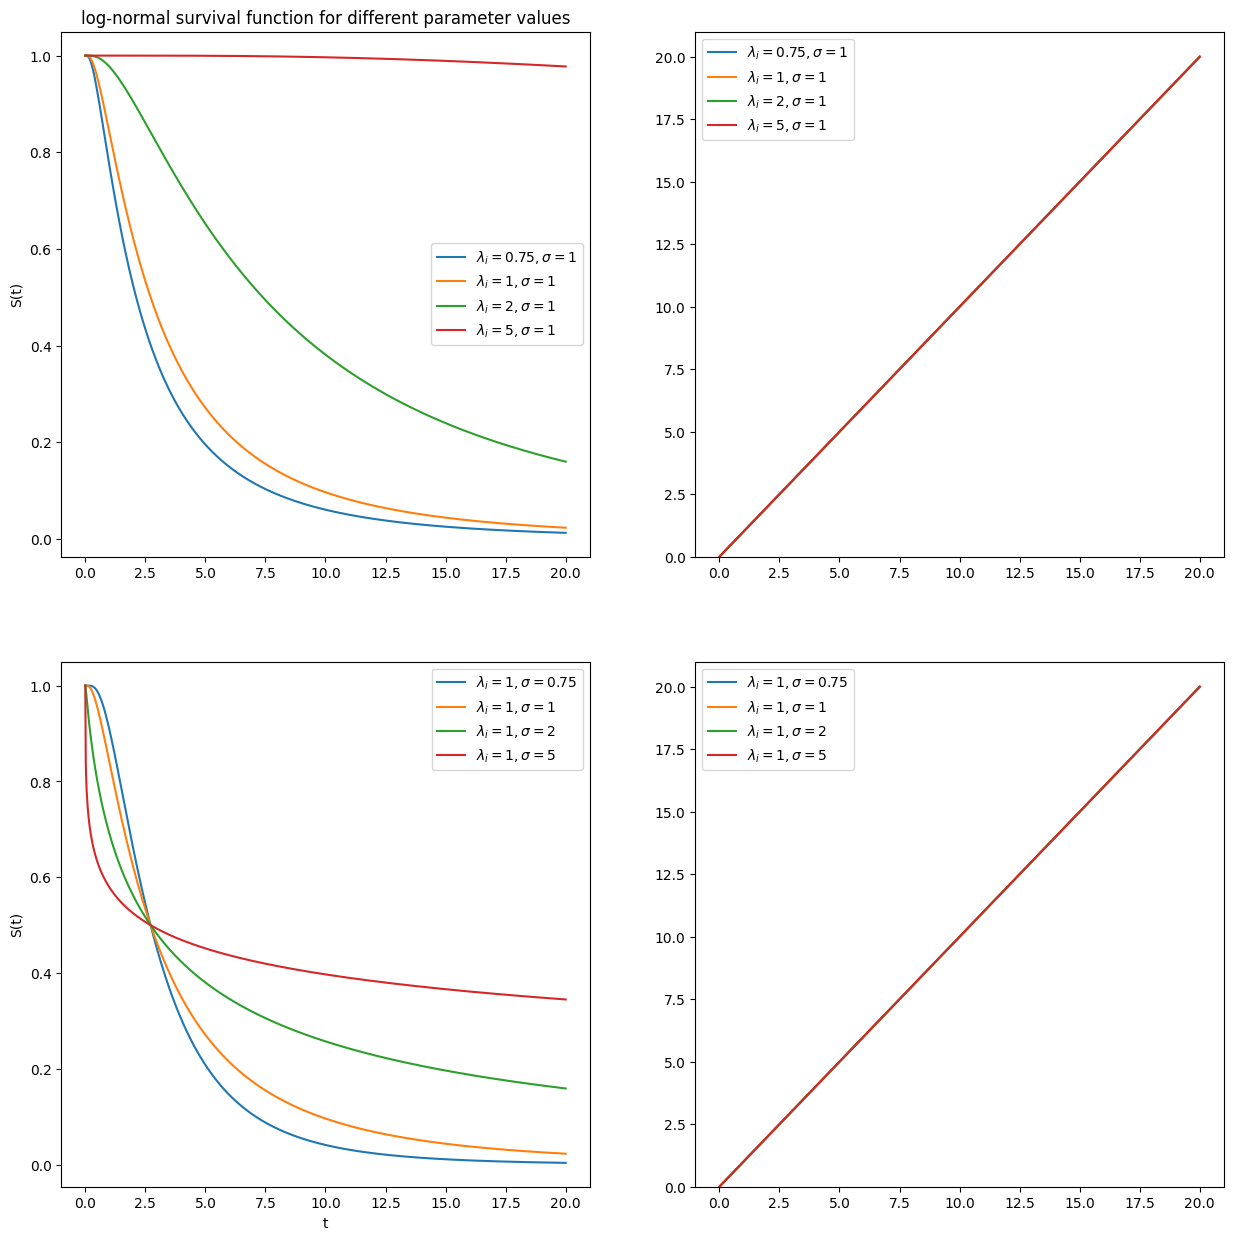

In [5]:
def log_norm_survival(mu_eta, sigma, t_grid):
    return 1 - norm.cdf([(np.log(t) - mu_eta) / sigma for t in t_grid])


def log_norm_hazard(mu_eta, sigma, t_grid):
    return t_grid


plot_survival_and_hazard(log_norm_survival, log_norm_hazard, t_grid, "log-normal")

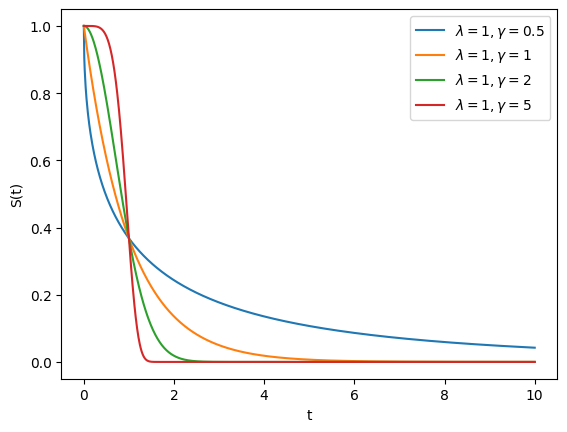

In [24]:
x = np.linspace(0, 10, 1000)

plt.figure()
plt.xlabel("t")
plt.ylabel("S(t)")
for c in [0.5, 1, 2, 5]:
    plt.plot(x, 1 - weibull_min.cdf(x, c), label=fr"$\lambda=1, \gamma={c}$")

plt.legend()    